### This file contains a preview of all the data pulled for S&P500 companies

![ratios definition](Ratios_def.png)

In [4]:
import datetime
import pandas as pd
import wrds

# Connect to WRDS
# conn = wrds.Connection()

# Date
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)

#print(conn.list_libraries())

2017-02-28 00:00:00
1830


<AxesSubplot:xlabel='long_term_credit_rating'>

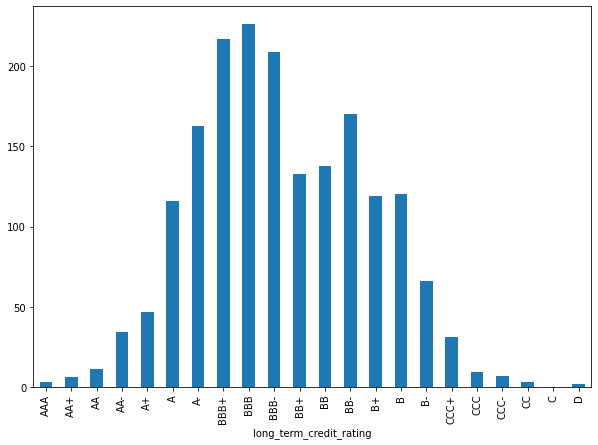

In [8]:
import matplotlib.pyplot as plt

# Open credit ratings file
creditRatingsFile = "data/credit_ratings_raw.csv"

creditRatingsDf = pd.read_csv(creditRatingsFile)
# creditRatingsDf = creditRatingsDf[creditRatingsDf['tic'].isin(tickers)]
creditRatingsDf['datadate'] = pd.to_datetime(creditRatingsDf['datadate'])

print(creditRatingsDf['datadate'].max())

# get the latest credit rating
latestCreditRatingsDf = creditRatingsDf[creditRatingsDf['datadate'] == creditRatingsDf['datadate'].max()]

# rename splticrm to long term credit rating
latestCreditRatingsDf = latestCreditRatingsDf.rename(columns={'splticrm': 'long_term_credit_rating'})

latestCreditRatingsDf = latestCreditRatingsDf[['tic', 'long_term_credit_rating']]

# count number of unique tic values
print(latestCreditRatingsDf['tic'].nunique())

# save unique tic values to list
creditRatingsTickers = latestCreditRatingsDf['tic'].tolist()

fig, ax = plt.subplots(figsize=(10, 7))

indexes = [
    'AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC', 'C', 'D'
]

latestCreditRatingsDf.value_counts('long_term_credit_rating').reindex(indexes).plot.bar(ax= ax)

In [26]:
# get a list of tickers
tickers = creditRatingsTickers

print(tickers)
tickerString = []
for ticker in tickers:
    tickerString.append("ticker = '" + str(ticker) + "'")

tickerString = ' or '.join(tickerString)

# get the data
firmRatioDf = conn.raw_sql("select * from wrdsapps_finratio.firm_ratio where " + tickerString )

['AIR', 'AAL', 'PNW', 'ABT', 'AMD', 'ASMIY', 'AET', 'APD', 'EGN1', 'SO1', 'ALK', 'Y', 'HON', 'HES', 'AMR1', 'PRI', 'ECOL', 'AEP', 'AXP', 'AXP1', 'AFL', 'AIG', 'ANAT', 'AME', 'AMGN', 'ADI', 'NBR', 'APA', 'AEP1', 'AAPL', 'AMAT', 'EPAC', 'ADM', 'PNW1', 'ETR1', 'ARW', 'ASH', 'ACLLF', 'SO7', 'ATW', 'ADSK', 'ADP', 'AVHI.1', 'AVY', 'AVT', 'AVP', 'BTI', 'BHI', 'BALL', 'BPOP', 'BK', 'BCR', 'GOLD', 'BAX', 'BDX', 'VZ', 'BCE', 'BMS', 'BRK.B', 'BBY', 'BIO', 'BKH', 'HRB', 'VAL', 'BA', '0141A', 'RFP', 'BAM', 'BGGSQ', 'BMY', 'TU', 'BP', 'BTY10', 'BF.B', 'CAL', 'BC', 'BRK3', 'MTZ', 'UIS', 'CI', 'CNA', 'CSX', 'CBT', 'CACI', '0176A', 'CPB', 'CNI', 'CP', 'CDNAF', 'STZ', 'CAJ', 'CAH', 'CSL', 'DUK8', 'CRS', 'CAT', 'BBVA1', 'LUMN', 'MGLN', 'JPM', 'CVX', 'EAT', 'CHD', 'CHDN', 'CBB', 'CIN1', 'CTAS', 'IHRT', 'CLF', 'CLX', 'COKE', 'KO', 'CDE', 'COHR.1', 'CL', 'CGP1', 'AON', 'CMCSA', 'CMA', 'CBSH', 'C', 'CMC', 'CAR', 'CA', 'DXC', 'CAG', 'NU1', 'CTWS', 'ED', 'CMS', 'CLR', 'CTB', 'COO', 'TAP', 'GLW', 'CR', 'AGC1', 

In [3]:
# Save to csv
saveToFile = False
if(saveToFile):
    firmRatioDf.to_csv('data/firm_ratio_all.csv')
else:
    firmRatioDf = pd.read_csv('data/firm_ratio_all.csv')


In [4]:
# treat public_date as date
firmRatioDf['public_date'] = pd.to_datetime(firmRatioDf['public_date'])

firmRatioDf['public_date'].value_counts()


2017-02-28    906
2017-03-31    901
2017-05-31    900
2017-01-31    897
2016-12-31    897
             ... 
1970-05-31    297
1970-04-30    296
1970-03-31    295
1970-02-28    295
1970-01-31    293
Name: public_date, Length: 624, dtype: int64

In [6]:
# treat public_date as date
firmRatioDf['public_date'] = pd.to_datetime(firmRatioDf['public_date'])

latestOnly = firmRatioDf[firmRatioDf['public_date'] == datetime.datetime(2017, 2, 28)]

columnsOfInterest = ['gsector', 'gicdesc', 'public_date', 'ticker', 'roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']

ratiosOfInterestDf = latestOnly[columnsOfInterest]

ratiosOfInterestDf

,gsector,gicdesc,public_date,ticker,roa,intcov_ratio,quick_ratio,intcov,bm,npm,debt_assets,debt_ebitda,inv_turn,cash_ratio
193,20.0,Industrials,2017-02-28,AAL,0.157149,5.798263,0.665369,3.583012,0.160266,0.066600,0.926181,3.107877,26.259581,0.504397
817,35.0,Health Care,2017-02-28,ABT,0.105949,17.004695,3.654955,5.990610,0.369329,0.050976,0.606634,4.423317,3.222730,2.819069
1428,55.0,Utilities,2017-02-28,PNW,0.086478,4.160918,0.417366,3.148717,0.916132,0.126343,0.691587,3.222494,7.668622,0.006869
2263,45.0,Information Technology,2017-02-28,AMD,-0.018351,-0.833333,1.321694,-2.185897,0.040272,-0.116339,0.874737,-24.322034,4.006998,0.939079
2521,35.0,Health Care,2017-02-28,AET,0.091393,16.495268,1.521825,8.164038,0.410072,0.035959,0.740506,3.688806,NaN,1.116508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353831,25.0,Consumer Discretionary,2017-02-28,VAC,0.112692,7.292518,NaN,5.028155,0.461546,0.075831,0.620385,2.733527,1.568138,NaN
353957,20.0,Industrials,2017-02-28,XYL,0.118947,8.964912,1.063813,5.561404,0.286189,0.068947,0.659098,3.577039,4.521466,0.248788
354142,35.0,Health Care,2017-02-28,ACHC,0.112626,2.454940,1.234579,1.033878,0.782834,0.002185,0.637249,5.666243,411.877389,0.166430
354263,45.0,Information Technology,2017-02-28,MX,0.058419,0.089420,1.209879,-0.823808,NaN,-0.043047,1.163172,8.228450,8.831259,0.662183


In [7]:
# save to csv
ratiosOfInterestDf.to_csv('ratios_of_interest_all.csv')

In [8]:
# Merge credit ratings with ratios
mergedDf = pd.merge(ratiosOfInterestDf, latestCreditRatingsDf, left_on='ticker', right_on='tic', how='inner')

mergedDf.drop(columns=['tic'], inplace=True)

mergedDf

,gsector,gicdesc,public_date,ticker,roa,intcov_ratio,quick_ratio,intcov,bm,npm,debt_assets,debt_ebitda,inv_turn,cash_ratio,long_term_credit_rating
0,20.0,Industrials,2017-02-28,AAL,0.157149,5.798263,0.665369,3.583012,0.160266,0.066600,0.926181,3.107877,26.259581,0.504397,BB-
1,35.0,Health Care,2017-02-28,ABT,0.105949,17.004695,3.654955,5.990610,0.369329,0.050976,0.606634,4.423317,3.222730,2.819069,BBB
2,55.0,Utilities,2017-02-28,PNW,0.086478,4.160918,0.417366,3.148717,0.916132,0.126343,0.691587,3.222494,7.668622,0.006869,A-
3,45.0,Information Technology,2017-02-28,AMD,-0.018351,-0.833333,1.321694,-2.185897,0.040272,-0.116339,0.874737,-24.322034,4.006998,0.939079,CCC+
4,35.0,Health Care,2017-02-28,AET,0.091393,16.495268,1.521825,8.164038,0.410072,0.035959,0.740506,3.688806,NaN,1.116508,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,25.0,Consumer Discretionary,2017-02-28,VAC,0.112692,7.292518,NaN,5.028155,0.461546,0.075831,0.620385,2.733527,1.568138,NaN,BB+
902,20.0,Industrials,2017-02-28,XYL,0.118947,8.964912,1.063813,5.561404,0.286189,0.068947,0.659098,3.577039,4.521466,0.248788,BBB
903,35.0,Health Care,2017-02-28,ACHC,0.112626,2.454940,1.234579,1.033878,0.782834,0.002185,0.637249,5.666243,411.877389,0.166430,B+
904,45.0,Information Technology,2017-02-28,MX,0.058419,0.089420,1.209879,-0.823808,NaN,-0.043047,1.163172,8.228450,8.831259,0.662183,CCC+


In [9]:
# save to csv
mergedDf.to_csv('ratios_with_credit_ratings_all.csv')